# Immigration, the stock market, and GDP

The objective of this project is to practice working with Pandas Dataframes. To successfully complete this homework, you may use any resources available to you. 

Answer the following question: What has a higher correlation with the GDP in the US: stock market returns or immigration?

You need to accomplish the following tasks:
1. Install the [wbdata](http://wbdata.readthedocs.io/en/latest/) package for API access to Worldbank data.
2. Explore the databases `Population estimates and projections`, `Global Financial Development`, and `World Development Indicators`.
3. Get the data on `GDP per capita growth (annual %)` as a dataframe.
4. Get the data on `Net immigration` as a dataframe (Make sure that you also have a percentage value for this). 
5. Get the data on `Stock market return (%, year-on-year)` as a dataframe.
5. Explore the data and note the issues. 
5. Clean and combine the data.
6. What is the correlation between the GDP and net immigration and stock market returns. 

In [155]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [156]:
import pandas as pd
import wbdata
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [100]:
wbdata.get_source()

11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
12	Education Statistics
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
21	Global Economic Monitor Commodities
55	Commodity Prices- History and Projections
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Population estimates and projections
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistics
54	Joint External Debt Hub
25	Jobs
37	LAC Equity Lab
19	M

In [101]:
wbdata.get_indicator(source=40)

SH.DYN.NMRT      	Mortality rate, neonatal (per 1,000 live births)
SH.DYN.MORT.MA   	Mortality rate, under-5, male (per 1,000 live births)
SH.DYN.MORT.FE   	Mortality rate, under-5, female (per 1,000 live births)
SH.DYN.MORT      	Mortality rate, under-5 (per 1,000 live births)
SH.DYN.0514      	Probability of dying at age 5-14 years (per 1,000 children age 5)
SH.DTH.NMRT      	Number of neonatal deaths
SH.DTH.MORT      	Number of under-five deaths
SH.DTH.IMRT      	Number of infant deaths
SH.DTH.0514      	Number of deaths ages 5-14 years
SP.URB.TOTL.IN.ZS	Urban population (% of total)
SP.URB.TOTL      	Urban population
SP.URB.GROW      	Urban population growth (annual %)
SP.RUR.TOTL.ZS   	Rural population (% of total population)
SP.RUR.TOTL.ZG   	Rural population growth (annual %)
SP.RUR.TOTL      	Rural population
SP.POP.TOTL.MA.ZS	Population, male (% of total)
SP.POP.TOTL.MA.IN	Population, male
SP.POP.TOTL.FE.ZS	Population, female (% of total)
SP.POP.TOTL.FE.IN	Population, female
S

In [102]:
wbdata.get_indicator(source=32)

SP.POP.TOTL   	Population, total
NY.GNP.MKTP.CD	GNI (current US$)
NY.GDP.PCAP.KD	GDP per capita (constant 2010 US$)
NY.GDP.PCAP.CD	GDP per capita (current US$)
NY.GDP.MKTP.CD	GDP (current US$)
GFDD.SM.01    	Stock price volatility
GFDD.SI.07    	Provisions to nonperforming loans (%)
GFDD.SI.06    	Liquid assets to deposits and short term funding (%)
GFDD.SI.05    	Bank regulatory capital to risk-weighted assets (%) 
GFDD.SI.04    	Bank credit to bank deposits (%)
GFDD.SI.03    	Bank capital to total assets (%)
GFDD.SI.02    	Bank nonperforming loans to gross loans (%)
GFDD.SI.01    	Bank Z-score
GFDD.OM.02    	Stock market return (%, year-on-year)
GFDD.OM.01    	Number of listed companies per 1,000,000 people 
GFDD.OI.19    	Banking crisis dummy (1=banking crisis, 0=none)
GFDD.OI.18    	Total factoring volume to GDP (%)
GFDD.OI.17    	Global leasing volume to GDP (%)
GFDD.OI.16    	Foreign bank assets among total bank assets (%)
GFDD.OI.15    	Foreign banks among total banks (%)
GFDD.O

In [157]:
# search all the indicators that are related to GDP growth
wbdata.search_indicators('GDP per capita growth')

NY.GDP.PCAP.KD.ZG	GDP per capita growth (annual %)
NV.AGR.PCAP.KD.ZG	Real agricultural GDP per capita growth rate (%)


In [158]:
# set country to US
country = ['US']
# get GDP per capita growth data 
indicator1 = {'NY.GDP.PCAP.KD.ZG': 'annual % GDP growth'}

In [159]:
GDP_growth = wbdata.get_dataframe(indicator1, country=country, convert_date=False)
GDP_growth.head()

,annual % GDP growth
date,
2017,NaN
2016,0.784618
2015,2.113705
2014,1.612538
2013,0.967811


In [172]:
wbdata.search_indicators('population growth')

SP.URB.GROW   	Urban population growth (annual %)
SP.RUR.TOTL.ZG	Rural population growth (annual %)
SP.POP.GROW   	Population growth (annual %)


In [182]:
# get data for net immigration and total population  
indicator2 = {'SM.POP.NETM': 'Net Migration','SP.POP.TOTL': 'Population'}

In [244]:
migration = wbdata.get_dataframe(indicator2, country=country, convert_date=False)

In [246]:
# replace the NaN value with the preceding valid value 
Net_immigration= migration.fillna(method='bfill')
Net_immigration.head(6)

,Net Migration,Population
date,,
2017,4500000.0,323127513.0
2016,4500000.0,323127513.0
2015,4500000.0,320896618.0
2014,4500000.0,318563456.0
2013,4500000.0,316204908.0
2012,4500000.0,313998379.0


In [247]:
# calculate immigration percentage
Net_immigration['Migration Pct'] = (Net_immigration['Net Migration']/Net_immigration['Population'])*100
Net_immigration.head(6)

,Net Migration,Population,Migration Pct
date,,,
2017,4500000.0,323127513.0,1.392639
2016,4500000.0,323127513.0,1.392639
2015,4500000.0,320896618.0,1.402321
2014,4500000.0,318563456.0,1.412591
2013,4500000.0,316204908.0,1.423128
2012,4500000.0,313998379.0,1.433128


### Net migration data is collected every 5 years and has a lot NaN data. So I replaced NaN data with the preceding valid value that it has 

In [109]:
wbdata.search_indicators('Stock market return')

GFDD.OM.02	Stock market return (%, year-on-year)


In [132]:
indicator3= {'GFDD.OM.02': 'Stock Return %'}
Stock_return = wbdata.get_dataframe(indicator3, country=country, convert_date=False)
Stock_return.head()

,Stock Return %
date,
2015,6.71
2014,17.49
2013,19.17
2012,8.81
2011,11.20


In [250]:
# merge dataframes together
df =pd.concat([GDP_growth,Net_immigration,Stock_return], axis=1)
df.head()

,annual % GDP growth,Net Migration,Population,Migration Pct,Stock Return %
1960,NaN,NaN,180671000.0,NaN,NaN
1961,0.618121,NaN,183691000.0,NaN,18.67
1962,4.480669,1829274.0,186538000.0,0.980644,-5.96
1963,2.908272,1829274.0,189242000.0,0.966632,12.10
1964,4.340549,1829274.0,191889000.0,0.953298,16.48


In [252]:
# drop all the rows that have NaN value 
df1=df.dropna(axis=0)
df1.isnull().sum()

annual % GDP growth    0
Net Migration          0
Population             0
Migration Pct          0
Stock Return %         0
dtype: int64

In [258]:
# calculation the correlation between them 
df1.corr()

,annual % GDP growth,Net Migration,Population,Migration Pct,Stock Return %
annual % GDP growth,1.000000,-0.153572,-0.360614,-0.070025,0.335633
Net Migration,-0.153572,1.000000,0.707744,0.965778,0.133833
Population,-0.360614,0.707744,1.000000,0.514370,0.083849
Migration Pct,-0.070025,0.965778,0.514370,1.000000,0.142323
Stock Return %,0.335633,0.133833,0.083849,0.142323,1.000000


In [259]:
corr = df1[["annual % GDP growth","Migration Pct","Stock Return %"]].corr()

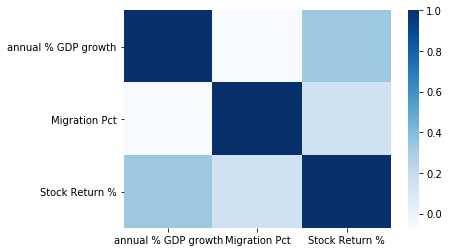

In [260]:
sns.heatmap(corr, cmap='Blues')

# Insights
* Stock market is positively correlated with GDP growth, but immigration is nagetively correlated with GDP grwoth.
* Although politicians should consider the negative relationship between immigrants and GDP growth, the degree of that is not that strong 
* Stock market has a much stronger positive relationship with GDP growth

# Reference

http://wbdata.readthedocs.io/en/latest/index.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html